## ML 과제

과제할 때 꿀팁!

1. 이전 세션들에서의 자료를 찾아본다.
2. 질문방에 질문한다.
3. 구글링한다.
4. 복붙하지 않고 직접 타이핑해서 코드를 완성한다.

In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings(action='ignore')

### 0. Titanic 데이터 로드 및 훓어보기

In [3]:
# 여러분이 이전 과제로 만드셨을 FE를 진행한 데이터 보다는 원본 데이터가 조금 더 이번 실습에 적합하기 때문에 원본을 사용하겠습니다.
# 데이터를 로드하고, 잘 불러와진 것인지 첫 5행을 불러와 확인해보세요.

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 변수들의 데이터 타입, 결측치, target의 imbalance 여부를 확인해주세요.

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# 편의상 결측치 데이터 및 승객 고유의 데이터('PassengerId','Name', 'Ticket', 'Cabin')는 모두 drop 시킵시다.
# 실제 프로젝트에서는 이렇게 하시면 성능이 낮을 수 있어요!!

drop_col = ['Age','PassengerId','Name','Ticket','Cabin']
titanic = titanic.drop(columns = drop_col)
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,male,1,0,7.2500,S
1,1,1,female,1,0,71.2833,C
2,1,3,female,0,0,7.9250,S
3,1,1,female,1,0,53.1000,S
4,0,3,male,0,0,8.0500,S


In [6]:
# categorical feature(Sex, Embarked)에 대해 LabelEncoding을 진행해 주세요.
# 전처리 완료된 DataFrame을 첫 5행을 불러와 확인해보세요

titanic['Sex'].replace({'male':0,'female':1},inplace=True)
titanic['Embarked']=titanic['Embarked'].map({'S':0,'C':1,'Q':2,np.nan:4})
titanic.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,1,0,7.2500,0
1,1,1,1,1,0,71.2833,1
2,1,3,1,0,0,7.9250,0
3,1,1,1,1,0,53.1000,0
4,0,3,0,0,0,8.0500,0


### 1. Train-Test split & 종속변수-설명변수 분할

In [7]:
# 분할을 위해 필요한 적절한 패키지를 불러와주세요 
# train-test split 및 종속변수-설명변수 분할을 진행해주세요

from sklearn.model_selection import train_test_split

y = titanic.Survived
X = titanic.drop('Survived', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state = 1219)

In [ ]:
DecisionTreeClassifier

### 2. Decision Tree를 통한 Classification

In [8]:
titanic['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [12]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [70]:
titanic[titanic.Pclass>2].groupby('Survived').size(), titanic[titanic.Pclass<=2].groupby('Survived').size()

(Survived
 0    372
 1    119
 dtype: int64,
 Survived
 0    177
 1    223
 dtype: int64)

In [77]:
# Decision Tree에서 categorical feature인 'Pclass'를 기준으로 첫 번째 Node(Root Node)가 분리된다고 가정합시다.
# 이 때 Entropy 지표를 통해 Information Gain을 계산할 수 있는 함수(또는 코드)를 작성하고, Information gain을 계산하세요.
# 실습에서 다루지 않은 내용입니다. 코드가 어려우시다면 줄글로만 풀이과정을 작성해주셔도 됩니다.

# titanic data로 Pclass를 분리기준으로 이용했을 때의 entropy를 계산하는 상황만 고려하시면 됩니다.
# 계산에 사용할 데이터는 분할 이전의 0번에서 전처리 완료한 데이터를 기준으로 하겠습니다!
# 올바르게 계산할 시 Information Gain은 0.0097이 나옵니다.

root_impurity = -(549/891*np.log2(549/891) + 342/891*np.log2(342/891))
left_impurity = -(177/400*np.log2(177/400) + 223/400*np.log2(223/400))
right_impurity = -(372/491*np.log2(372/491) + 119/491*np.log2(119/491))

child_impurity = left_impurity*400/891 + right_impurity*491/891
information_gain = root_impurity - child_impurity
information_gain

0.07579362743608165

##### <b>줄글 답안</b>
> root node에서 Survived가 0,1에 따라 불순도를 구하고 Pclass가 1,2일 때와 3일 때를 기준으로 구분하여 각각의 불순도를 구하였다. 각각의 비율을 이용해서 자식 노드들의 불순도를 구하고 차를 구하여 information_gain을 구하였다. 0.0097과 다른 이유는.. 계산식이 잘못 되었거나 나누는 기준이 다른 것 같다..

In [78]:
# Decision Tree 모델을 사용하기 위한 적절한 패키지를 불러와 주세요
# 별 다른 parameter 설정 없이 객체를 만들어 주고, 학습을 진행하세요

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### 3. Graphviz를 통한 시각화

graphviz 설치를 하지 않으셨거나 오류가 난다면 이 부분은 건너뛰셔도 좋습니다

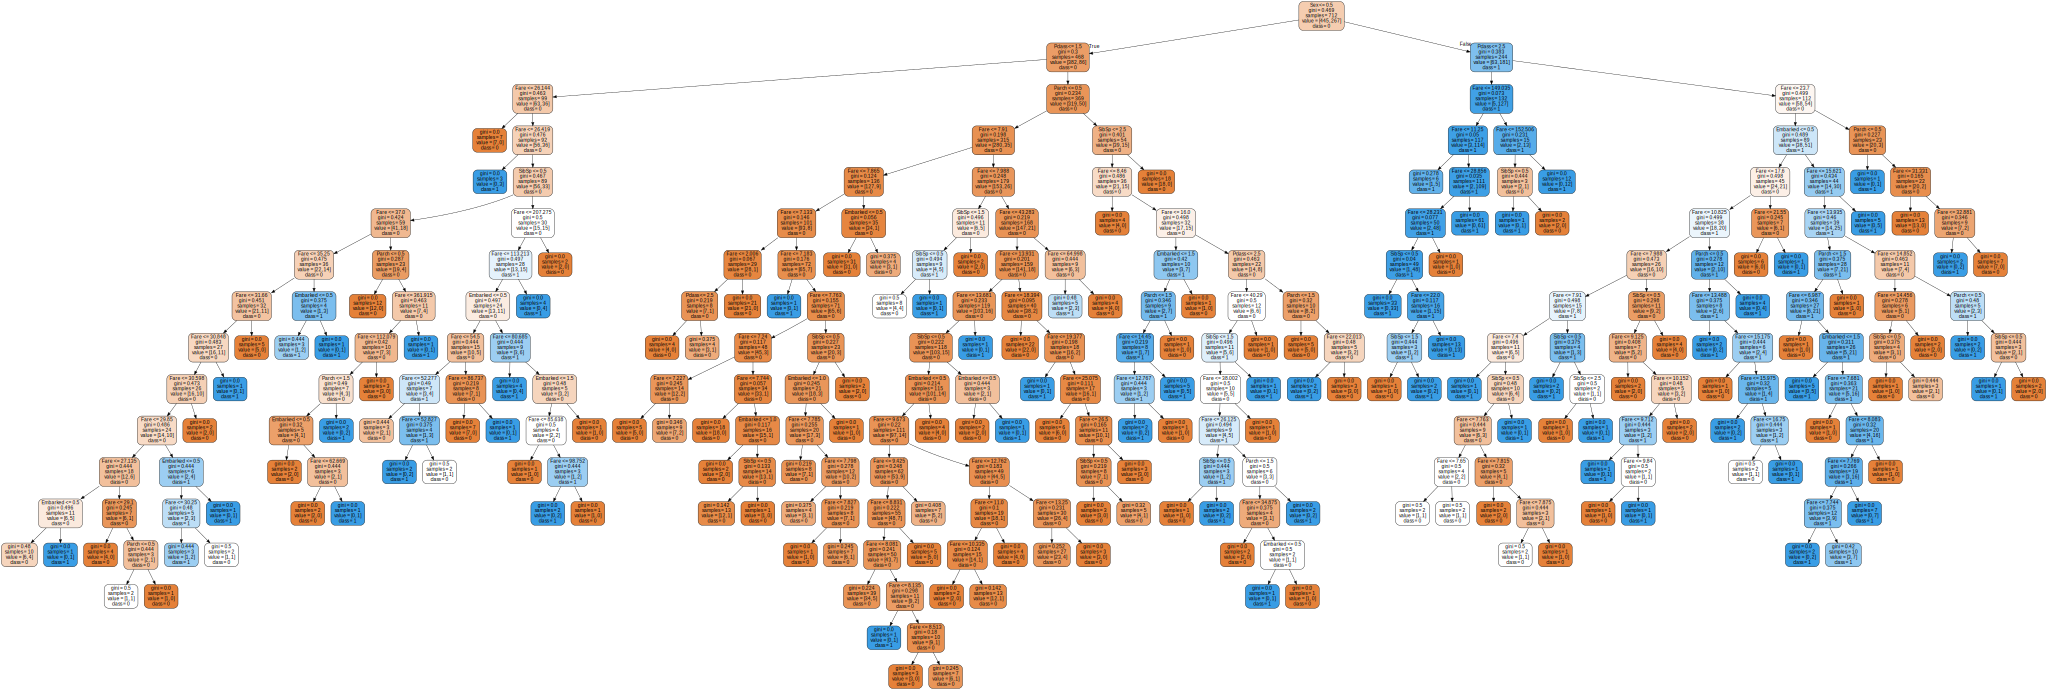

In [80]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,
                out_file=("titanic_hw.dot"),
                feature_names=X_train.columns,
                class_names=['0','1'],
                rounded=True,
                filled=True)

import graphviz
import os

os.environ["PATH"] += os.pathsep + 'C:/graphviz-2.38/release/bin'

with open("titanic_hw.dot") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

### 4. 결과 확인

In [82]:
# test 데이터에 대하여 predict

proba = dt_clf.predict_proba(X_test)
proba

array([[0.16666667, 0.83333333],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.5       , 0.5       ],
       [0.5       , 0.5       ],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.8       , 0.2       ],
       [0.3       , 0.7       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.875     , 0.125     ],
       [0.        , 1.        ],
       [0.4       , 0.6       ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [1.

In [86]:
prediction =dt_clf.predict(X_test)
print(prediction)

[1 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1
 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 1]


In [84]:
# accuracy, f1 score, roc_auc score, confusion matrix, classification report를 모두 불러와주세요
# 불러온 metric(결과 확인 지표)들을 통해 결과를 확인해주세요.

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report

cf_matrix = confusion_matrix(y_test, prediction)
cf_matrix

array([[89, 15],
       [23, 52]], dtype=int64)

In [92]:
print('Accuray: ', accuracy_score(y_test, prediction))
print('f1_score: ', f1_score(y_test, prediction))
print('ROC_AUC_score: ', roc_auc_score(y_test, prediction))
print(classification_report(y_test, prediction))

Accuray:  0.7877094972067039
f1_score:  0.7323943661971832
ROC_AUC_score:  0.7745512820512822
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       104
           1       0.78      0.69      0.73        75

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



### 5. GridSearch를 통한 Tree pruning

In [96]:
# GridSearch를 위한 적절한 패키지를 불러와 주세요
# max_leaf_nodes를 제외한 3가지 이상의 parameter에 대한 GridSearch를 진행해주세요. scoring은 원하시는 지표로 하셔도 됩니다.

from sklearn.model_selection import GridSearchCV
grid_dt = DecisionTreeClassifier()

criterion = ['entropy','gini']
max_depth = [5,10,15]
min_samples_split = [5,10,15]

grid_params = {'criterion':criterion, 'max_depth':max_depth, 'min_samples_split':min_samples_split}

gs = GridSearchCV(estimator = grid_dt, param_grid = grid_params, scoring = 'accuracy')
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                

In [97]:
# 최적 parameter 조합 / Validation score / Test score를 확인해 주세요.

print("Best parameters: ", gs.best_params_)
print("Validation Score: ", gs.best_score_)

Best parameters:  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 15}
Validation Score:  0.8034177090515119


In [100]:
gs_prediction = gs.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, gs_prediction))

Accuracy score:  0.7877094972067039


In [ ]:
## GridSearch에 사용하신 parameter는 Decision Tree 모델 학습에서 어떤 역할을 하는지 간단하게 요약해주세요.
## ex) criterion은 decision tree의 분류 기준인 불순도 지표를 정한다.
## hint) Shift+tab

# criterion: impurity의 지표를 어떤 것으로 사용할 것인지. entropy 또는 gini.
# max_depth: decision tree의 최대 높이
# min_samples_split: 노드를 분할하기 위한 최소 데이터수. 작을수록 분할 노드가 많아지고 과적합되어 이를 제어하는 데에 사용.

> ### <b>고생하셨습니다~</b>

생각보다 GridSearch의 결과가 안 좋게 나와서 이상하다 생각하신 분들도 있을 수 있습니다. GridSearch 특성상 기존에 정해준 parameter 범위 내에서 찾는 것이기 때문에 애초에 적절한 parameter 후보를 찾지 못했다면 성능이 안 좋을 수도 있습니다. 앞으로 여러 프로젝트 진행해보시면서, parameter 찾는 것에 대한 감도 스스로 익혀보시면 좋을 것 같습니다!